### [Python] 웹 크롤링 및 텍스트 파싱을 이용한 성경 다운로더

https://cpuu.postype.com/post/26176

In [1]:
# 2023-10-12 17:33:04.154285


from datetime import datetime

print(datetime.now())

2023-10-12 17:33:04.154285


파이썬을 이용하여 웹 크롤링(Crawling)을 구현한다. 크롤링으로 가져온 html데이터에서 텍스트 파싱하여 활용하고자하는 정보를 선별하여 추출한다.



성경(聖經)은 통상 기독교 또는 유대교 신앙의 최고 경전을 일컫는다. 성경은 구약성경과 신약성경으로 이루어져 있으며 각각 히브리어와 그리스어로 씌인 원본을 번역한 형태로 각 국가에서 사용하고 있다. 대한민국의 경우 2015년 현재 가장 많이 사용하는 역본은 ‘개역개정 4판(대한성서공회)’, ‘표준새번역(대한성서공회)’ 등이 있으며 그 밖에도 ‘현대인의 성경(생명의 말씀사)’, ‘우리말 성경(두란노)’, ‘메세지 성경(복있는 사람)’ 등의 다양한 역본이 존재한다. 이렇게 다양한 역본은 각각 출판사의 저작물로 등록되어 책으로 출판되고, 최근에는 스마트폰 어플리케이션 형태로 출시되고있다.

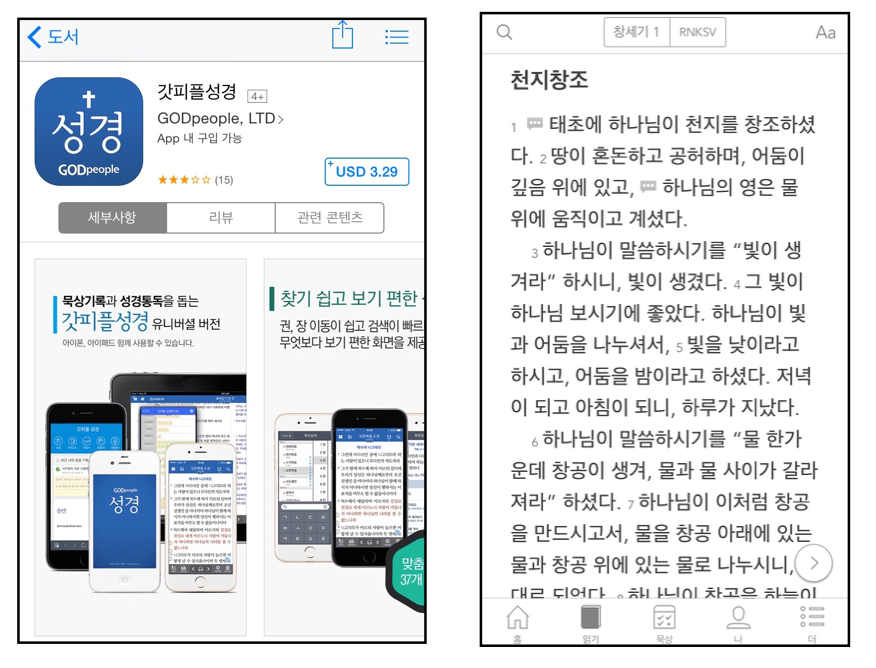

In [3]:
from IPython.display import Image

Image('./images/f39a80450f99fa3dd119d9539773852e.png')

아이폰 앱스토어의 갓피플 성경

온라인에서도 각 성경을 역본별로 열람할 수 있다. 이러한 서비스를 제공하는 홈페이지는 대표적으로 Holy-Bible 다국어 성경( http://www.holybible.or.kr ), YouVersion( https://www.bible.com/ko ), 대한성서공회(http://www.bskorea.or.kr )이 있으며, (사)정보통신선교회 약정에 의해 컨텐츠에 대한 저작권을 명시한 채 공유되고 있다. 크롤링 사용은 저작권과 관련하여 민감한 소지가 있다. 이러한 방법을 유포하여 이득을 취하려는 행위는 저작권법에 의거 처벌될 수 있으므로, 단지 개인 연구목적용으로만 사용할 것이며, 이미 저작권 보호 기간이 만료된 ‘개역 한글판’에 대하여 진행한다.

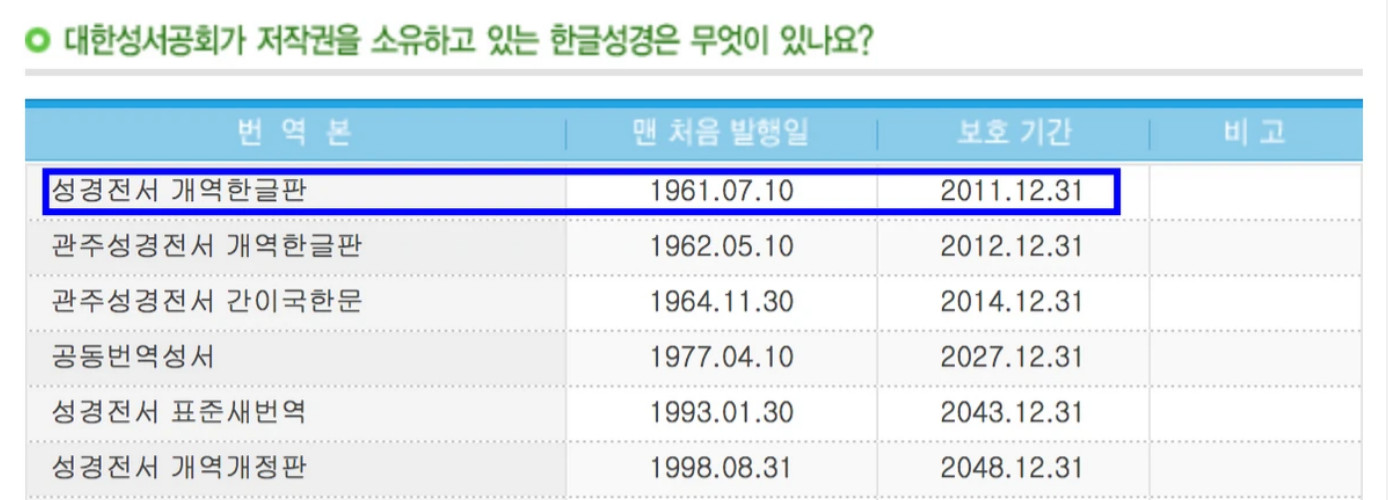

In [4]:
Image('./images/Cap 2023-10-12 17-39-59-749.jpg')

In [ ]:
성경전서 개역한글판의 보호기간은 2011년 만료되었다.

그럼 지금부터 상세 분석에 들어가도록 한다.

1) 홈페이지 구조 확인 : 먼저 웹 크롤링을 수행항 대상 홈페이지를 선정한다. 여기에서는 대한성서공회( http://www.bskorea.or.kr )를 이용하였다. 해당 홈페이지에서 확인할 수 있는 정보는 URL 입력 부분과 본문 TEXT 부분이다. URL의 구조를 분석하면 원하는 장/절 구분을 수행하는 쿼리(Qeury)를 추정할 수 있다. 또한, 본문 TEXT는 다수의 HTML 코드를 파싱하여 정확하게 원하는 Table id의 내용만을 추출하여 파일로 저장하도록 할 것이다.

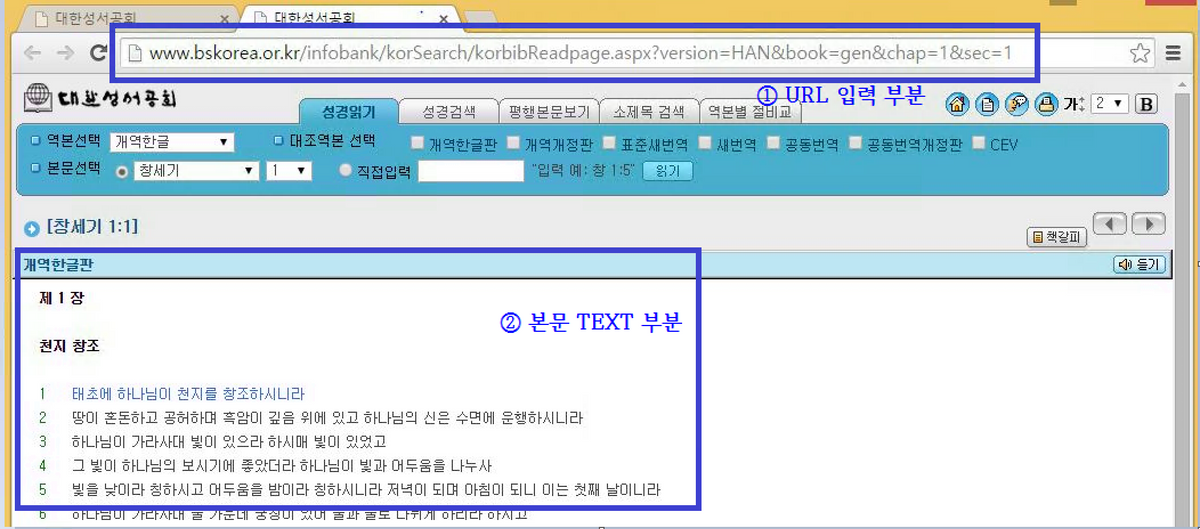

In [5]:
Image('./images/4cd2242a07a9654f212181667851b6a7.png')

URL 입력부분과 본문 부분을 나누어서 생각해보자

2) URL 규칙 분석 :

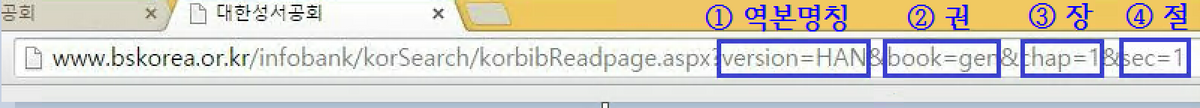

In [7]:
Image('./images/9712d14b8948d5729de85ea3aa08b633.png')

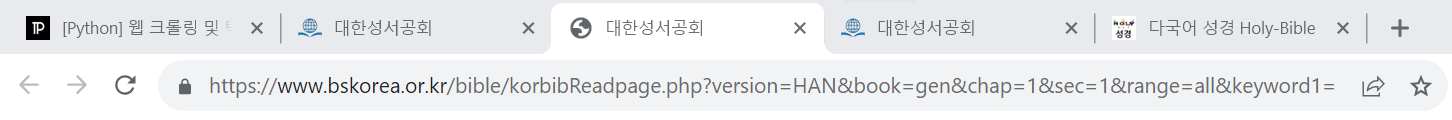

In [9]:
Image('./images/Cap 2023-10-12 17-49-11-188.png', width=1000)

In [ ]:
https://www.bskorea.or.kr/bible/korbibReadpage.php?version=HAN&book=gen&chap=1&sec=1&range=all&keyword1=

위와 같은 형식의 주소에서 ~.aspx? 뒷 부분에 파라미터를 주는 방식임을 알 수 있다. 주요 파라미터는 4가지로 ① 역본명칭, ② 권, ③ 장, ④ 절 이고, 폰트를 설정하는 등의 기타 파라미터는 크롤링에 큰 영향을 미치지 않으므로 생략해도 무방하다. 해당 파라미터로 전달되는 변수값은 성경 본문의 정해진 규칙을 따른 것으로 확인되었다. 구체적인 매핑은 다음과 같다.

① 역본명칭

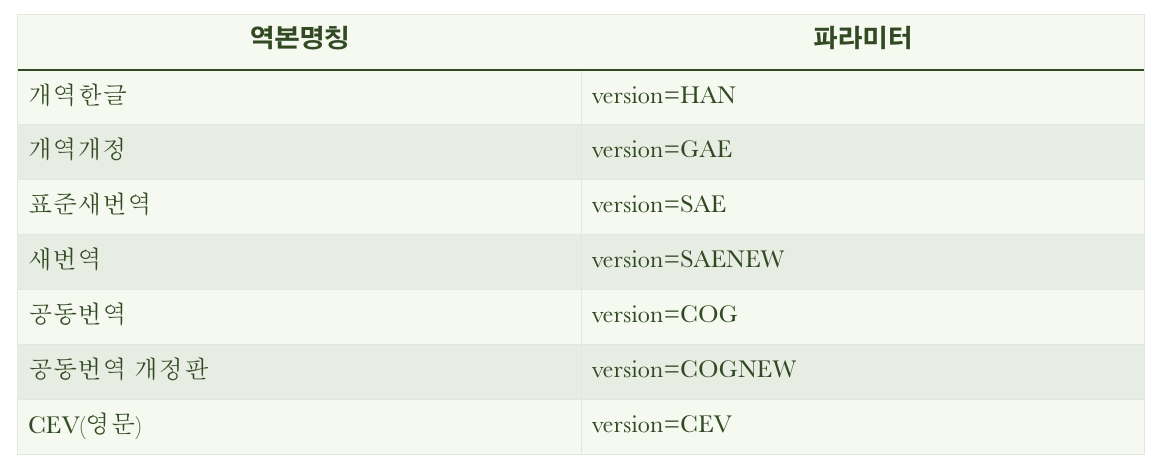

In [6]:
Image('./images/36ccb37a038015efab1ca914ad9caa9a.png')

② 권 : 개신교에서 성경은 통상적으로 구약 39권, 신약 27권으로 총 66권만을 확고한 정경으로 인정하고 있다. 예를들어 구약의 첫번째 책인 ‘창세기’는 영어로 ‘Genesis’로 표기하고, 신약의 ‘로마서’는 ‘Romans’로 표기한다. 대한성서공회에서는 이 영문 이름의 첫 3글자를 약어로 사용하여 파라미터로 사용하고 있음을 확인하였다.

In [80]:
# bibles = [['01창세기','gen',50] ,['02출애굽기','exo',40],
# ['03레위기','lev',27],['04민수기','num',36],['05신명기','deu',34],
# ['06여호수아','jos',24],['07사사기','jdg',21],['08룻기','rut',4],
# ['09사무엘상','1sa',31,['10사무엘하','2sa',24],['11열왕기상','1ki',22],
# ['12열왕기하','2ki',25],['13역대상','1ch',29],['14역대하','2ch',36],
# ['15에스라','ezr',10],['16느헤미야','neh',13],['17에스더','est',10],
# ['18욥기','job',42],['19시편','psa',150],['20잠언','pro',31],
# ['21전도서','ecc',12],['22아가','sng',8],['23이사야','isa',66],
# ['24예레미야','jer',52],['25예레미야애가','lam',5],['26에스겔','ezk',48],
# ['27다니엘','dan',12],['28호세아','hos',14],['29요엘','jol',3],
# ['30아모스','amo',9],['31오바댜','oba',1],['32요나','jnh',4],
# ['33미가','mic',7],['34나훔','nam',3],['35하박국','hab',3],
# ['36스바냐','zep',3],['37학개','hag',2],['38스가랴','zec',14],
# ['39말라기','mal',4],['40마태복음','mat',28],['41마가복음','mrk',16],
# ['42누가복음','luk',24,['43요한복음','jhn',21],['44사도행전','act',28],
# ['45로마서','rom',16],['46고린도전서','1co',16],['47고린도후서','2co',13],
# ['48갈라디아서','mal',6],['49에베소서','eph',6],['50빌립보서','php',4],
# ['51골로새서','col',4],['52데살로니가전서','1th',5],['53데살로니가후서','2th',3],
# ['54디모데전서','1ti',6],['55디모데후서','2ti',4],['56디도서','tit',3],
# ['57빌레몬서','phm',1],['58히브리서','heb',13],['59야고보서','jas',5],
# ['60베드로전서','1pe',5],['61베드로후서','2pe',3],['62요한1서','1jn',5],
# ['63요한2서','2jn',1],['64요한3서','3jn',1],['65유다서','jud',1],
# ['66요한계시록','rev',22]]

In [53]:
from string import punctuation

print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


3) HTML 구조 분석 및 파싱 : 해당 페이지의 소스를 확인하기 위해서는 페이지를 html형태로 다운로드하거나, 구글 크롬 등의 브라우저에서 제공하는 ‘소스보기’기능을 활용한다. HTML 파일 안에는 다양한 내용이 포함되어 있으며, 웹페이지를 구성하기 위한 자바스크립트 코드가 섞여있다. 내용안에는 필요한 부분과 불필요한 부분이 다수 섞여있기 때문에 파싱을 통해 정확히 원하는 콘텐츠만 가져오는 것이 핵심이다. 

성경본문에 해당하는 내용은 HTML 1172번째 line부터 시작되며, id = “tbBible1” 을 사용하고 있다. 이 내용을 선별하여 긁어오면 된다.

4. 파이썬(Python 2.7) 소스코드 작성 :

① HTML 파싱하여 본문 추출 : 우선 웹 크롤링을 위해 사용할 파이썬 라이브러리를 다운로드(http://www.crummy.com/software/BeautifulSoup/)하고 설치한다. 이 라이브러리를 사용하면(import BeautifulSoup, urllib2) 본문 내용을 가져올 수 있다.

https://www.crummy.com/software/BeautifulSoup/

In [207]:
# %%time

# %%writefile D:\Korean_bible_project\korean_bible.py
    
# """
# korean_bible.py

# This module collect Korean bible verses from the "대한성서공회  웹사이트"
# http://www.bskorea.or.kr

# Author: CB Park
# Date: Oct. 12, 2023
# """    

# import os
# import requests
# import pandas as pd
# from bs4 import BeautifulSoup
# from pprint import pprint
# from tqdm import tqdm


# BIBLES = [['01창세기', 'gen', '50'], ['02출애굽기', 'exo', '40'], ['03레위기', 'lev', '27'], 
#  ['04민수기', 'num', '36'], ['05신명기', 'deu', '34'], ['06여호수아', 'jos', '24'], 
#  ['07사사기', 'jdg', '21'], ['08룻기', 'rut', '4'], ['09사무엘상', '1sa', '31'], 
#  ['10사무엘하', '2sa', '24'], ['11열왕기상', '1ki', '22'], ['12열왕기하', '2ki', '25'], 
#  ['13역대상', '1ch', '29'], ['14역대하', '2ch', '36'], ['15에스라', 'ezr', '10'], 
#  ['16느헤미야', 'neh', '13'], ['17에스더', 'est', '10'], ['18욥기', 'job', '42'], 
#  ['19시편', 'psa', '150'], ['20잠언', 'pro', '31'], ['21전도서', 'ecc', '12'], 
#  ['22아가', 'sng', '8'], ['23이사야', 'isa', '66'], ['24예레미야', 'jer', '52'], 
#  ['25예레미야애가', 'lam', '5'], ['26에스겔', 'ezk', '48'], ['27다니엘', 'dan', '12'], 
#  ['28호세아', 'hos', '14'], ['29요엘', 'jol', '3'], ['30아모스', 'amo', '9'],
#  ['31오바댜', 'oba', '1'], ['32요나', 'jnh', '4'], ['33미가', 'mic', '7'], ['34나훔', 'nam', '3'], 
#  ['35하박국', 'hab', '3'], ['36스바냐', 'zep', '3'], ['37학개', 'hag', '2'], 
#  ['38스가랴', 'zec', '14'], ['39말라기', 'mal', '4'], ['40마태복음', 'mat', '28'],
#  ['41마가복음', 'mrk', '16'], ['42누가복음', 'luk', '24'], ['43요한복음', 'jhn', '21'],
#  ['44사도행전', 'act', '28'], ['45로마서', 'rom', '16'], ['46고린도전서', '1co', '16'],
#  ['47고린도후서', '2co', '13'], ['48갈라디아서', 'gal', '6'], ['49에베소서', 'eph', '6'], 
#  ['50빌립보서', 'php', '4'], ['51골로새서', 'col', '4'], ['52데살로니가전서', '1th', '5'],
#  ['53데살로니가후서', '2th', '3'], ['54디모데전서', '1ti', '6'], ['55디모데후서', '2ti', '4'], 
#  ['56디도서', 'tit', '3'], ['57빌레몬서', 'phm', '1'], ['58히브리서', 'heb', '13'],
#  ['59야고보서', 'jas', '5'], ['60베드로전서', '1pe', '5'], ['61베드로후서', '2pe', '3'], 
#  ['62요한1서', '1jn', '5'], ['63요한2서', '2jn', '1'], ['64요한3서', '3jn', '1'],
#  ['65유다서', 'jud', '1'], ['66요한계시록', 'rev', '22']]

# BIBLES = [ (bible[0], bible[1], int(bible[2])) for bible in BIBLES]
# BASE_URL = 'http://www.bskorea.or.kr'
 

# class KoreanBible():
        
#     def get_chapter_url(self, book_en, chapter):
#         url = f'{BASE_URL}/bible/korbibReadpage.php?version=HAN&book={book_en}&chap={chapter}'
#         return url

#     def get_soup(self, book_en, chapter):
#         url = self.get_chapter_url( book_en=book_en, chapter=chapter)
#         print(url)
#         response = requests.get(url)
#         if response.status_code == 200:
#             soup = BeautifulSoup(response.content, 'lxml')
#         else:
#             print(f'Error: {response.status_code}')
#             soup = None
#         return soup

#     def get_bible_chapter_contents(self, book, book_en, chapter):
#         soup = self.get_soup(book_en, chapter)
#         if soup.find('font', class_='smallTitle'):
#             small_title = soup.find('font', class_='smallTitle').text
#         else:
#             small_title = None
#         idx = 0
#         chap_df = pd.DataFrame(columns=['book','book_en','chapter', 'verse_no', 'verse', 'small_title' ])
#         for item in tqdm(soup.find_all('span'), desc='get_bible_chapter_contents'):
#             flag = False
#             if item.find('span', class_='number'):
#                 num = item.find('span', class_='number').text
#             text = item.text
#             if text != num:
#                 if text == '성경 단어 검색':
#                     flag = True
#                     break
#                 else:
#                     # print(text)
#                     verse_num = text.split('\xa0\xa0\xa0')[0].strip()
#                     verse = text.split('\xa0\xa0\xa0')[1].strip()
#                     chap_df.loc[idx] = [book, book_en, chapter, num, verse, small_title ]
#                     idx +=1
#             if flag:
#                 break
#         return  chap_df
    
#     def parse_bible_meta_data(self, bible, verbose=True):
#         if verbose: print(bible)
#         book = bible[0]
#         filename = f'{book}.csv'
#         book_no = bible[0][ :2].strip()
#         book_ko = bible[0][2: ].strip()
#         book_en = bible[1].strip()
#         max_chap_num = bible[2]
#         if verbose: print(filename, book_no, book_ko,  book_en, max_chap_num)
#         return filename, book_no, book_ko, book_en, max_chap_num

#     def get_bible_book_contents(self, bible, path):
#         filename, book_no, book_ko, book_en, max_chap_num = self.parse_bible_meta_data(
#                                                                            bible, verbose=False)
#         book_df = pd.DataFrame()
#         for num in tqdm(range(max_chap_num), desc='get_bible_book_contents'):
#             chapter = num + 1
#             chap_df = self.get_bible_chapter_contents(book=book_ko, book_en=book_en, chapter=chapter)
#             book_df = pd.concat([book_df, chap_df], ignore_index=True) 
#         filepath = os.path.join(path, filename)
#         book_df.to_csv(filepath, index=False)
#         print(f'"{filepath}" is saved.')
#         return book_df

#     def get_all_bible_contents(self, bibles, path):
#         for bible in tqdm(bibles, desc='get_all_bible_contents'):
#             print(bible)
#             self.get_bible_book_contents(bible, path)

    
# def main():
    
#     print(f'\n1.Collecting Bible Chapter Contents.')
    
# #     # ['01창세기', 'gen', '50']
# #     bible = BIBLES[0]
# #     print(bible)

# #     kb = KoreanBible()
# #     chapter = 1
# #     filename, book_no, book_ko, book_en, max_chap_num = kb.parse_bible_meta_data(bible, 
# #                                                                                  verbose=False)
# #     soup = kb.get_soup(book_en, chapter)
# #     chap_num = soup.find('font', class_='chapNum').text
# #     small_title = soup.find('font', class_='smallTitle').text
# #     print(chap_num)
# #     print(small_title)
    
# #     df =  kb.get_bible_chapter_contents(book_ko, book_en, chapter)
# #     display(df)


#     print(f'\n2.Collecting Bible Book Contents.')
    
# #     # ['06여호수아', 'jos', '24']
# #     bible = BIBLES[5]
# #     print(bible)
# #     kb = KoreanBible()
# #     filename, book_no, book_ko, book_en, max_chap_num = kb.parse_bible_meta_data(bible, 
# #                                                                                  verbose=False)
# #     path = '.\data'
# #     book_df = kb.get_bible_book_contents(bible, path)
    

#     print(f'\n3.Collecting All Bible Contents.')
#     # CPU times: total: 1min 53s
#     # Wall time: 31min 23s

# #     path = '.\data'
# #     kb = KoreanBible()
# #     kb.get_all_bible_contents(BIBLES, path)

# if __name__ == '__main__':
#     main()


In [209]:
df = pd.read_csv('./bibles/개역한글/12열왕기하.csv')
print(df.info())
display(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   book         719 non-null    object
 1   book_en      719 non-null    object
 2   chapter      719 non-null    int64 
 3   verse_no     719 non-null    object
 4   verse        719 non-null    object
 5   small_title  719 non-null    object
dtypes: int64(1), object(5)
memory usage: 33.8+ KB
None


,book,book_en,chapter,verse_no,verse,small_title
0,열왕기하,2ki,1,1,아합이 죽은 후에 모압이 이스라엘을 배반하였더라,엘리야와 아하시야 왕
1,열왕기하,2ki,1,2,아하시야가 사마리아에 있는 그 다락 난간에서 떨어져 병들매 사자를 보내며 저희더러 ...,엘리야와 아하시야 왕
2,열왕기하,2ki,1,3,여호와의 사자가 디셉 사람 엘리야에게 이르시되 너는 일어나 올라가서 사마리아 왕의 ...,엘리야와 아하시야 왕
3,열왕기하,2ki,1,4,그러므로 여호와의 말씀이 네가 올라간 침상에서 내려오지 못할찌라 네가 반드시 죽으리...,엘리야와 아하시야 왕
4,열왕기하,2ki,1,5,사자들이 왕에게 돌아오니 왕이 이르되 너희는 어찌하여 돌아왔느냐,엘리야와 아하시야 왕
...,...,...,...,...,...,...
714,열왕기하,2ki,25,26,대소 백성과 군대 장관들이 다 일어나서 애굽으로 갔으니 이는 갈대아 사람을 두려워함...,예루살렘의 멸망(대하 36:13-21; 렘 52:3 하-11)
715,열왕기하,2ki,25,27,유다 왕 여호야긴이 사로잡혀 간지 삼십 칠년 곧 바벨론 왕 에윌므로닥의 즉위한 원년...,예루살렘의 멸망(대하 36:13-21; 렘 52:3 하-11)
716,열왕기하,2ki,25,28,선히 말하고 그 위를 바벨론에 저와 함께 있는 모든 왕의 위보다 높이고,예루살렘의 멸망(대하 36:13-21; 렘 52:3 하-11)
717,열왕기하,2ki,25,29,그 죄수의 의복을 바꾸게 하고 그 일평생에 항상 왕의 앞에서 먹게 하였고,예루살렘의 멸망(대하 36:13-21; 렘 52:3 하-11)


In [190]:
book_df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1533 entries, 0 to 1532
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   book         1533 non-null   object
 1   book_en      1533 non-null   object
 2   chapter      1533 non-null   int64 
 3   verse_no     1533 non-null   object
 4   verse        1533 non-null   object
 5   small_title  1533 non-null   object
dtypes: int64(1), object(5)
memory usage: 72.0+ KB


In [212]:
df = pd.read_csv('./bibles/개역한글/01창세기.csv')
print(df['verse'][10])
display(df)

하나님이 가라사대 땅은 풀과 씨 맺는 채소와 각기 종류대로 씨 가진 열매 맺는 과목을 내라 하시매 그대로 되어


,book,book_en,chapter,verse_no,verse,small_title
0,창세기,gen,1,1,태초에 하나님이 천지를 창조하시니라,천지 창조
1,창세기,gen,1,2,땅이 혼돈하고 공허하며 흑암이 깊음 위에 있고 하나님의 신은 수면에 운행하시니라,천지 창조
2,창세기,gen,1,3,하나님이 가라사대 빛이 있으라 하시매 빛이 있었고,천지 창조
3,창세기,gen,1,4,그 빛이 하나님의 보시기에 좋았더라 하나님이 빛과 어두움을 나누사,천지 창조
4,창세기,gen,1,5,빛을 낮이라 칭하시고 어두움을 밤이라 칭하시니라 저녁이 되며 아침이 되니 이는 첫째...,천지 창조
...,...,...,...,...,...,...
1528,창세기,gen,50,22,요셉이 그 아비의 가족과 함께 애굽에 거하여 일백 십세를 살며,요셉이 형들을 위로하다
1529,창세기,gen,50,23,에브라임의 자손 삼대를 보았으며 므낫세의 아들 마길의 아들들도 요셉의 슬하에서 양육...,요셉이 형들을 위로하다
1530,창세기,gen,50,24,요셉이 그 형제에게 이르되 나는 죽으나 하나님이 너희를 권고하시고 너희를 이 땅에서...,요셉이 형들을 위로하다
1531,창세기,gen,50,25,요셉이 또 이스라엘 자손에게 맹세시켜 이르기를 하나님이 정녕 너희를 권고하시리니 너...,요셉이 형들을 위로하다


In [130]:
s = '1   태초에 하나님이 천지를 창조하시니라'
print(s.split())

['1', '태초에', '하나님이', '천지를', '창조하시니라']


http://www.bskorea.or.kr/bible/korbibReadpage.php?version=HAN&book=gen&chap=1

In [19]:
# -*- coding:utf-8 -*-
__author__ = 'CPUU'


from bs4 import BeautifulSoup
import urllib
import requests
if __name__ == "__main__":
    # url setting
    book = 'gen'            # 창세기
    chapter = 1             # 1장을 가져온다.
    url = "http://www.bskorea.or.kr/infobank/korSearch/korbibReadpage.aspx?version=HAN&book=%s&chap=%d"%(book, chapter)
    print(url)
    # crawling bible chapter
    response = requests.get(url)                  # URL에 접속하여
    soup = BeautifulSoup(response.content, 'lxml' )    # BeautifulSoup 을 사용하여 긁어온 후
    chap = soup.findAll("td", {"id" : "tdBible1"})  # td 이면서, id tag 가 tbBible1 인 내용을 chap에 저장한다.
    print(chap)                                      # 가져온 내용을 출력한다.

    print('Complete!\n')

http://www.bskorea.or.kr/infobank/korSearch/korbibReadpage.aspx?version=HAN&book=gen&chap=1
[]
Complete!



In [20]:
book = 'gen'            # 창세기
chapter = 11             # 1장을 가져온다.
url = "http://www.bskorea.or.kr/infobank/korSearch/korbibReadpage.aspx?version=HAN&book=%s&chap=%d"%(book, chapter)
print(url)


http://www.bskorea.or.kr/infobank/korSearch/korbibReadpage.aspx?version=HAN&book=gen&chap=11


In [213]:
# 2023-10-13 09:05:01.749479

print(datetime.now())

2023-10-13 09:05:01.749479
